In [1]:
!ls

Data_exploration.ipynb    Preliminaries.pdf         numpy
Dissertation contract.pdf data                      s41586-021-03854-z.pdf
Image-4.jpeg              hodgevj4.pdf              trial1.py


In [2]:
import os
import numpy as np
import pandas as pd



df=pd.DataFrame();
def Create_df(name):
    
    
    df= pd.DataFrame(np.loadtxt(name), columns=['station','timestamp','min', 'max'])
    df['timestamp'] = pd.to_datetime(df['timestamp'], format='%Y%m%d%H%M')
    #df.describe()
    #df['station'].unique()
    df['file_type']= dirname

    #print(df)

    return df

for dirname, _, filenames in os.walk('data'):
    for filename in filenames:
        if 'Press' in filename:
            #print(dirname+filename)
            df2=Create_df(str(dirname+'/'+filename))
            df=df.append(df2)

        
df['min']=df['min'].replace(0, np.nan)        
df['max']=df['max'].replace(0, np.nan) 

print(df)


      station           timestamp     min     max            file_type
0      4201.0 1997-05-31 00:00:00  1004.8  1008.6           data/Carra
1      4201.0 1997-05-31 01:00:00  1004.8  1008.6           data/Carra
2      4201.0 1997-05-31 02:00:00  1004.7  1008.5           data/Carra
3      4201.0 1997-05-31 03:00:00  1004.6  1008.4           data/Carra
4      4201.0 1997-05-31 04:00:00  1004.3  1008.1           data/Carra
...       ...                 ...     ...     ...                  ...
1123   6193.0 1997-06-01 09:00:00  1025.9  1027.3  data/data1/combined
1124   6193.0 1997-06-01 12:00:00  1025.0  1026.3  data/data1/combined
1125   6193.0 1997-06-01 15:00:00  1024.5  1025.8  data/data1/combined
1126   6193.0 1997-06-01 18:00:00  1023.6  1024.9  data/data1/combined
1127   6193.0 1997-06-01 21:00:00  1022.9  1024.2  data/data1/combined

[197604 rows x 5 columns]


We are mainly interested on stations that belong to crude data-bases. Therefore we separate Carra data (checked manually) from the rest of the database 

In [3]:
df_true= df[df['file_type']=='data/Carra']

df=df[df['file_type']!='data/Carra']

In [24]:
df['station'].unique()[:]

#TO DO: find location of the stations for spatial correlation study

array([4201., 4202., 4203., 4207., 4208., 4210., 4214., 4220., 4221.,
       4228., 4230., 4231., 4242., 4250., 4253., 4260., 4261., 4266.,
       4270., 4272., 4285., 4301., 4310., 4312., 4313., 4320., 4330.,
       4339., 4351., 4360., 4382., 4390., 5700., 6005., 6009., 6010.,
       6011., 6024., 6030., 6034., 6041., 6043., 6048., 6052., 6058.,
       6060., 6070., 6071., 6075., 6079., 6080., 6081., 6096., 6104.,
       6108., 6110., 6119., 6120., 6124., 6142., 6143., 6149., 6151.,
       6153., 6159., 6160., 6165., 6168., 6169., 6170., 6180., 6181.,
       6184., 6190., 6191., 6193., 6100., 4217.])

# Series visualization

Let's start getting an idea of the data we are dealing with by making a representation of a single value (e.g pressure) for all the stations available 

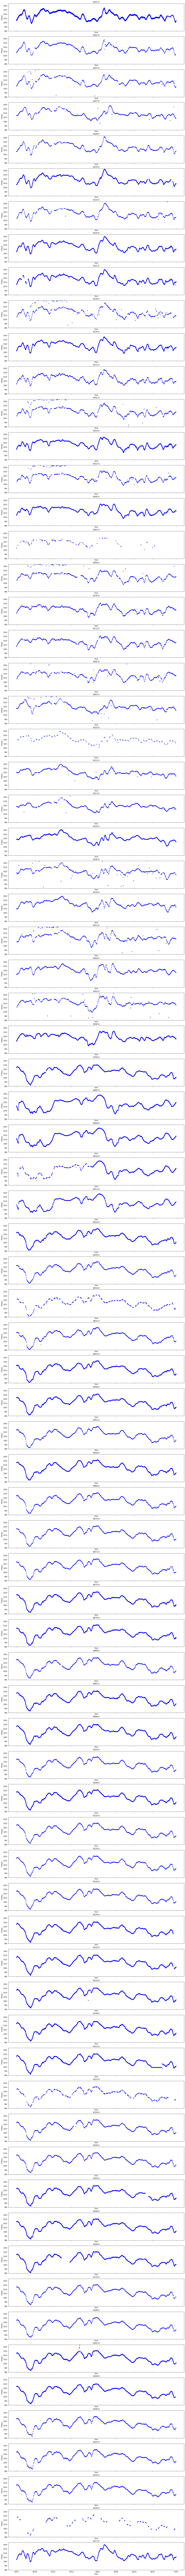

In [5]:
import matplotlib.pyplot as plt
import matplotlib.dates as md

#import matplotlib.axis.Axis as axis

stations= df['station'].unique()[:]
fig, ax = plt.subplots(len(stations), figsize=(20,300), sharex=True)
for i in range(len(stations)):
    df2=df[df['station']==stations[i]]
    
    ax[i].plot(df2['timestamp'],df2['max'], 'b.')
    ax[i].set_ylim(980, 1045)
    ax[i].xaxis.set_major_formatter(md.DateFormatter('%m/%d'))
    ax[i].set_title(str(stations[i]))
    ax[i].set_xlabel('Time')
    ax[i].set_ylabel("P(hpa)")


    #plt.plot(df2['timestamp'],df2['min'])
    del(df2)


Clearly there seems to be the spatial correlation between the different stations and the temporal correlation between the same station. Let's start by playing with the time coherence of the individual series, without paying attention to the neighbours

# EDA

We start by computing an histogramn of the slopes within the time series:









Mean step size:  -1.3866117567765692e-06
std:  0.0016318510274544572


'\nmu = np.mean(histo)\nvariance = np.std(histo)\nsigma = math.sqrt(variance)\nx = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)\nplt.plot(x, stats.norm.pdf(x, mu, sigma))\nplt.show()\n'

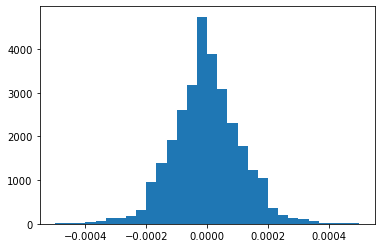

In [6]:
def get_slope(x, y):
    denom= (x[-1]-x[0])*1e-9
    if denom!=0.:
        return ((y[-1]-y[0])/ denom)
    else:
        return None
            
def collect_slopes(my_station, histo, stepsize):
    df2=df[df['station']==my_station]

    x=df2['timestamp'].to_numpy('float64')
    y=df2['max'].to_numpy('float64')

    for i in range(len(x)):
        histo.append(get_slope(x[i:i+stepsize+1],y[i:i+stepsize+1]))
    #plt.hist(histo, bins=300, range= (-1e-12, 1e-12 ))
    return histo

#print(dfdf[df['station']==my_station]['timestamp'].iloc(0))
#my_station=4330
histo=[]
for station in df['station'].unique():
    histo= collect_slopes(station, histo,1)
histo = list(filter(None, histo))    
plt.hist(histo[:], bins=30, range=(-5e-4, 5e-4 ), density=True)

mu= np.mean(histo)
std= np.std(histo)
print("Mean step size: ", np.mean(histo))
print("std: ", np.std(histo))
            
    
import scipy.stats as stats
import math

"""
mu = np.mean(histo)
variance = np.std(histo)
sigma = math.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma))
plt.show()
"""


# DBSCAN 

In order to detect candidate outliers we apply DBSCAN. This clustering technique regroups points in clusters by proximity and considers outliers the points without neighbours around. This technique does not require us to specify a number of clusters but does require though to tune hyperparameters such as the minimum distance between points for being considered a cluster or the minimum number of points per cluster. Moreover the metric used by the algorithm is euclidean but we are working with different features (i.e time-stamp and pressure). In this case we have to rescale both features in order to allow an euclidean distance computation. For this rescale we divided our pressure and timestamp by the standard deviation of the stepsize distribution along each axis.

We begin by testing our method within one station:

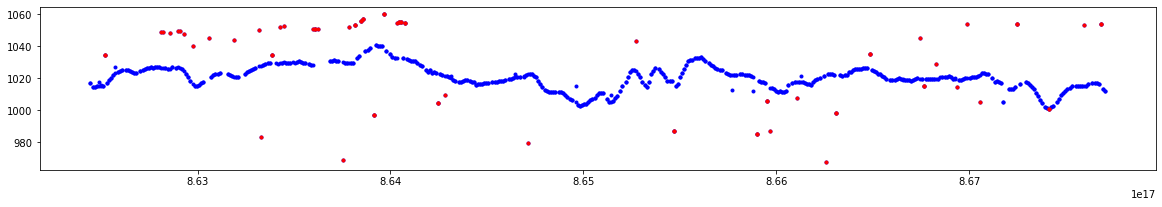

In [25]:
my_station=4330

df2=df[df['station']==my_station]

x=df2['timestamp']
y=df2['max']

from sklearn.cluster import DBSCAN

#clustering = DBSCAN(eps=3, min_samples=2).fit(np.array(x,y))

x = x.to_numpy('float64')

y = y.to_numpy('float64')

X = np.array([x,y])
X= X.T

X=np.delete(X, X[:,1] ==-1., axis=0)

#X=np.sort(X, axis= 0 , kind=None, order=None)


y_steps= [y[i+1]-y[i] for i in range(len(y)-1)]
x_steps= [x[i+1]-x[i] for i in range(len(x)-1)]


X[:,0]/=np.std(x_steps)
X[:,1]/=np.std(y_steps)


#np.concatenate((x,y), axis=0)
clustering = DBSCAN(eps=.32,min_samples=15, metric='euclidean').fit(X)

labels=clustering.fit_predict(X)
#for i in clustering.labels_:
    #print(i)
    
X[:,0]*=np.std(x_steps)
X[:,1]*=np.std(y_steps)

plt.figure(figsize=(20,3))

plt.plot(X[:,0], X[:,1], 'b.')
#plt.ylim(6.2, 6.8)

for i in range(len(clustering.labels_)):
    if clustering.labels_[i]==-1:
        plt.plot(X[i,0], X[i, 1], 'r.')
    """
    if(get_slope(x[i:i+2], y[i:i+2]) is not None and abs(get_slope(x[i:i+2], y[i:i+2]))>0.25*std):
        print(get_slope(x[i:i+2], y[i:i+2]))
        plt.plot(X[i,0], X[i, 1], 'r.')
    """


In general, it seems that DBSCAN is able to successfully flag outliers in a time distance-wise. Nevertheless some points that are suspiciously outlying the trend are not flag as such. On the other hand, points that are really close to the trend appear tagged as outlying. Two solutions are possible to remediate to this: a better hyperparameter tuning, which can be performed by systematic trials and comparison with Bjarne's work and a combination of DBSCAN with other methods based on different criteria. 